# Pymaceuticals Inc.
---

### Analysis

- Based off the box plot graph, Ramican and Capomulin decrease the tumor growth the most. The lower, 32, and upper, 40, quartile for both drugs are about the same. While the other two drugs have higher quartiles, suggesting that they aren't as effective.
- When looking at line plot for the drug Capomulin for mouse g228, the tumor size reduces by almost 10 milimeters, suggesting that the drug is effective at reducing the size of the tumor.
-For the scatter plot graph, a positive correlation can be seen as weight goes up so the average tumor volume. This suggests as the mouse gains weight we should expect to see the size of the tumor to go up as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]

In [3]:
study_results

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]

In [4]:
# Combine the data into a single dataset
mouse_study_merge=pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
mouse_study_merge.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [6]:
# Checking the number of mice.
unique=mouse_study_merge["Mouse ID"].unique()
len(unique)

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mouse_study_merge.loc[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "g989", :]
dup_mice_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_merge[mouse_study_merge['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [10]:
unique=clean_df["Mouse ID"].unique()
len(unique)

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem=clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stats=pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance":var,
                           "Tumor Volume Standard Deviation": std,
                           "Tumor Volume SEM": sem})
# Assemble the resulting series into a single summary DataFrame.
summary_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Standard Deviation  Tumor Volume SEM  
Drug Regimen                                                     
Capomulin                            4.994774          0.329346  
Ceftamin                             6.268188          0.469821  
Infubinol                            6.567243          0.492236  
Ketapril                             8.279709          0.603860  
Naftisol                             8.134708          0.596466  
Placebo                              7.821003          0.581331  
Propriva                             6.622085          0.544332  
Ramicane                             4.846308          0.320955  
Stelasyn                             7.710419          0.573111  
Zoniferol                            6.966589          0.516398

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary=mouse_study_merge.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std","sem"])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count.plot(kind="bar")
plt.title("timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

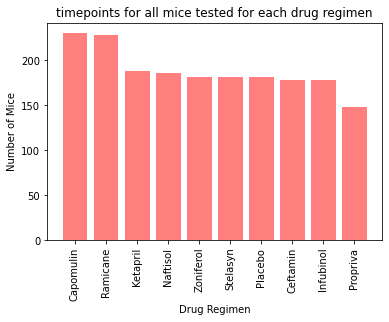

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=mice_count.index.values
y_axis=mice_count.values
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.title("timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()
plt.tight_layout()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=clean_df["Sex"].value_counts()
gender= gender.plot(kind="pie", y="Sex", autopct= "%1.1f%%", title=("female versus male mice " ))
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Text(0.5, 1.0, 'female versus male mice')

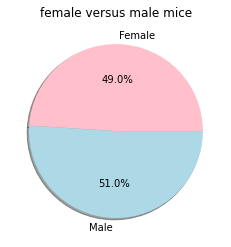

In [18]:
genders=["Female", "Male"]
gender_breakdown=[49, 51]
colors=["pink","lightblue"]
plt.pie(gender_breakdown, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True,)
plt.title("female versus male mice")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
Ramicane=clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
Infubinol=clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
Ceftamin=clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last=Capomulin.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol=pd.DataFrame(Capomulin_last)
Capomulin_merge=pd.merge(Capomulin_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128         45           38.982878                 2    Capomulin   
1     b742         45           38.939633                 0    Capomulin   
2     f966         20           30.485985                 0    Capomulin   
3     g288         45           37.074024                 1    Capomulin   
4     g316         45           40.159220                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male           7          21  
2    Male          16          17  
3    Male           3          19  
4  Female          22          22

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last=Ramicane.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol=pd.DataFrame(Ramicane_last)
Ramicane_merge=pd.merge(Ramicane_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a411         45           38.407618                 1     Ramicane   
1     a444         45           43.047543                 0     Ramicane   
2     a520         45           38.810366                 1     Ramicane   
3     a644         45           32.978522                 1     Ramicane   
4     c458         30           38.342008                 2     Ramicane   

      Sex  Age_months  Weight (g)  
0    Male           3          22  
1  Female          10          25  
2    Male          13          21  
3  Female           7          17  
4  Female          23          20

In [22]:
Infubinol_last=Infubinol.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol=pd.DataFrame(Infubinol_last)
Infubinol_merge=pd.merge(Infubinol_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a577         30           57.031862                 2    Infubinol   
3     a685         45           66.083066                 3    Infubinol   
4     c139         45           72.226731                 2    Infubinol   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female           6          25  
3    Male           8          30  
4    Male          11          28

In [23]:
Ceftamin_last=Ceftamin.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol=pd.DataFrame(Ceftamin_last)
Ceftamin_merge=pd.merge(Ceftamin_vol,clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a275         45           62.999356                 3     Ceftamin   
1     b447          0           45.000000                 0     Ceftamin   
2     b487         25           56.057749                 1     Ceftamin   
3     b759         30           55.742829                 1     Ceftamin   
4     f436         15           48.722078                 2     Ceftamin   

      Sex  Age_months  Weight (g)  
0  Female          20          28  
1    Male           2          30  
2  Female           6          28  
3  Female          12          25  
4  Female           3          25

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [25]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [26]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [27]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [28]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors=[Capomulin_tumors, Ramicane_tumors, Infubinol_tumors,Ceftamin_tumors ]
drugs=["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("tumor volume for each treatment group")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drugs")
ax1.boxplot(tumors, labels=drugs)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

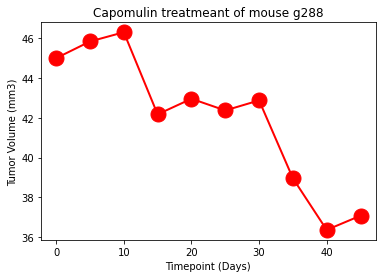

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_g288=Capomulin.loc[Capomulin["Mouse ID"]=="g288",:]
mouse_g288
x_axis = mouse_g288["Timepoint"]
tumsiz = mouse_g288["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse g288')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", )
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

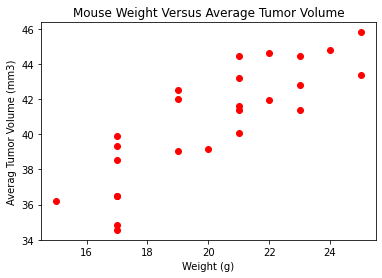

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


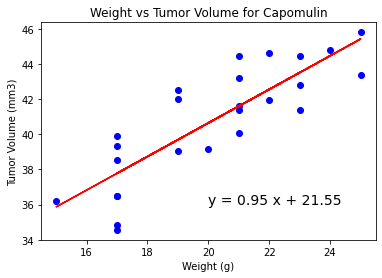

In [33]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()